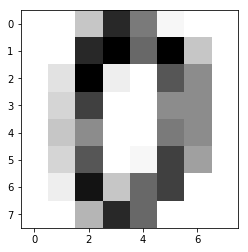

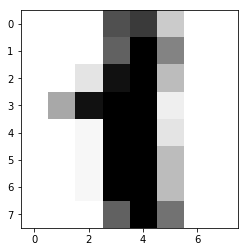

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

X, y = load_digits(n_class = 2, return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 8675309)

# Plot two examples
plt.imshow(X[0].reshape(8,8),cmap='Greys')
plt.show()
plt.imshow(X[1].reshape(8,8),cmap='Greys')
plt.show()

In [8]:
#QESTION 1
import math
l2_norm_b = math.sqrt(sum([(a-b)**2 for a, b in zip(X[1], X[0])]))
l1_norm = np.linalg.norm(X[0] - X[1],1)
l_infi_norm = np.linalg.norm(X[0] - X[1], np.inf)

print(str(X[0].shape) + " is the dimension of X[0]")
print(str((X[0]-2*X[1])[12]) + " is the thirteenth component of (X[0] minus two times X[1]")
print(str(round(l2_norm_b,1)) + " is the Euclidean distance")
print(str(l1_norm) + " is the L2 distance")
print(str(l_infi_norm) + " is the L infinite distance")

(64,) is the dimension of X[0]
-22.0 is the thirteenth component of (X[0] minus two times X[1]
59.6 is the Euclidean distance
335.0 is the L2 distance
16.0 is the L infinite distance


In [3]:
#QUESTION 2
def l2_norm(alpha, beta):
    
    # using axis to force the direction of the calculation
    #l2_norm_b = np.round(np.linalg.norm(alpha-beta, ord = 2, axis = 1),0)
    #l2_norm_b = np.round(np.linalg.norm(alpha-beta, ord = 2, axis = 0),0)
    
    l2_norm_b = np.linalg.norm(alpha-beta, ord = 2, axis = 1)
    #a=("The shape of result of L2_norm is " + str(l2_norm_b.shape))
    if len(l2_norm_b) == len(y_train):
        return l2_norm_b
    else:
        print("0")
        
def knn(x_in, k):
    norm_result = np.round(l2_norm(x_in, X_train),0)
    
    #pair the X_text - X_train result with y_lable
    paired_result = list(zip(norm_result, y_train))
    #pint(paired_result)
    
    #sorted by the first column x:x[0]
    # https://www.geeksforgeeks.org/python-ways-to-sort-a-zipped-list-by-values/
    sorted_paired_result = sorted(paired_result, key = lambda x:x[0])
    #pint(sorted_paired_result)
    
    a = np.sum(sorted_paired_result[0:5], axis = 0)
    
    if a[1]> np.round(k/2, 0):
        return 1
    else:
        return 0


knn(X_test[0], 5), knn(X_test[1], 5), knn(X_test[2], 5), knn(X_test[3], 5)

(1, 1, 0, 1)

In [4]:
print(y_test)

[1 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 0
 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0
 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1]


In [5]:
X_test.shape[0]

90

In [6]:
#QUESTION 3

y_test_l2_norm = []
for i in range(X_test.shape[0]):
    y_test_l2_norm.append(knn(X_test[i], 5))

#print(y_test_l2_norm)
pair = list(zip(y_test_l2_norm, y_test))
#print(pair)
y = np.sum(pair, axis = 1)

score = 0
for i in y:
    if i != 1:
        score += 1

print(str(score/y_test.shape[0]*100) + "% accuracy for " + str(len(y_test)) + " tests") 



100.0% accuracy for 90 tests
